Returns various figures describing hydrology and climate at a gauge. 

In [ ]:
%run A_FunctionDefinitions.ipynb ; #Contains all definitions 

In [2]:
#Identifying desired restrictions on gauge
subset=gaugefilter('fdc_info','err_1b',[0.25,0.253]) & gaugefilter('fdc_info','PctFlow',[98,101])
subset

{5393500, 6885500}

In [3]:
gauge=5393500 
returnattributeset('name')[returnattributeset('name').gauge_id==gauge]

,gauge_id,huc_02,gauge_name
298,5393500,7,"SPIRIT RIVER AT SPIRIT FALLS, WI"


Err 1b: 0.252962283789161
 
Seas: 0.5838192470398921
Snow: 0.19616986570515
Arid: 0.8735569364657141
45.44913,-89.97931


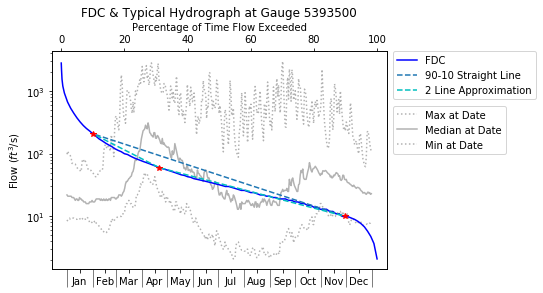

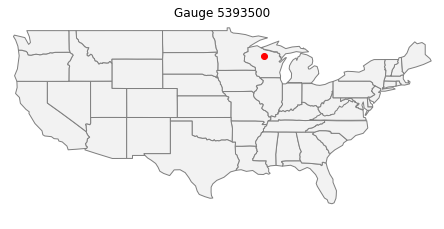

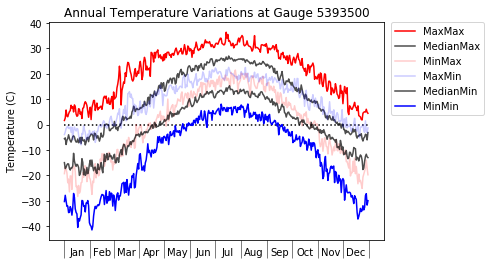

In [4]:
#Core information. This gave the very base level summary that I found important 
print('Err 1b: '+str(returnattributeset('fdc_info')[returnattributeset('fdc_info').gauge==gauge].err_1b.values[0]))
print(' ')
clim=returnattributeset('clim')
coor=returnattributeset('fdc_info')

print('Seas: '+str(clim[clim.gauge_id==gauge].p_seasonality.values[0]))
print('Snow: '+str(clim[clim.gauge_id==gauge].frac_snow.values[0]))
print('Arid: '+str(clim[clim.gauge_id==gauge].aridity.values[0]))
print(str(coor[coor.gauge==gauge].LAT.values[0])+','+str(coor[coor.gauge==gauge].LONG.values[0]))
fig=HydrographFDCOverlay(gauge)
fig=MapMaker(gauge)

fig = TypicalTemps(gauge)


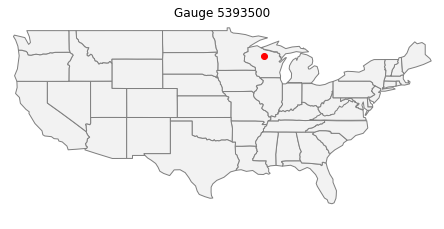

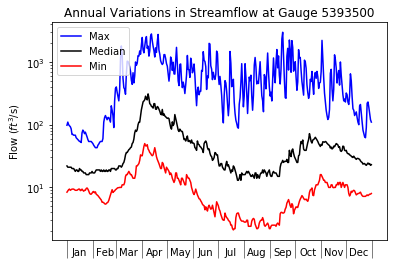

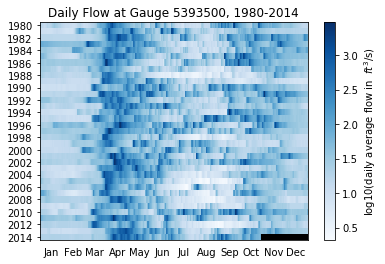

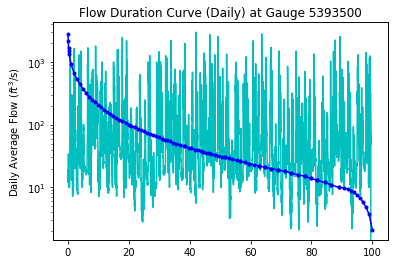

In [5]:
multiplot(gauge)

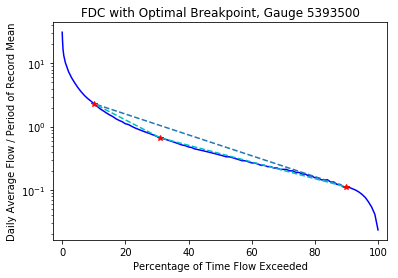

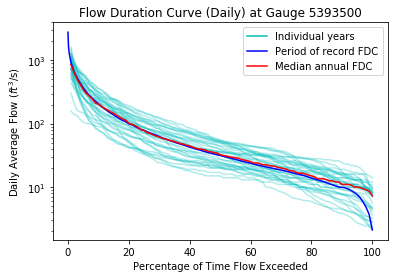

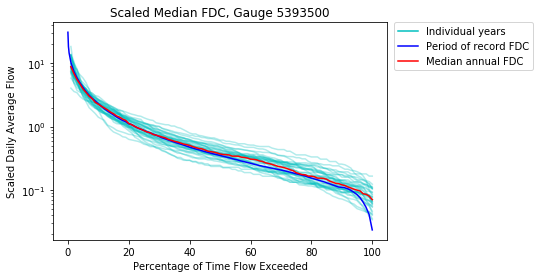

In [8]:
fig=FDC_breakpoints(gauge)
fig=MedianFDC(gauge)
fig=MedianScaledFDC(gauge)

In [9]:
returnattributes(gauge)

,gauge,HUC2,Dry,PctFlow,m_90-10,err_1_abs,err_1b,break,err_2_abs,err_2b,m_1,m_2,err_ratio_abs,LAT,LONG
298,5393500,7,0,100.0,3.793691,0.255108,0.252962,31.0,0.051736,0.026877,5.919969,3.03688,4.930967,45.44913,-89.97931


FDC INFO


,gauge_id,huc_02,gauge_name
298,5393500,7,"SPIRIT RIVER AT SPIRIT FALLS, WI"


NAME


,Gauge,HUC2,Years,Mean,Std,sd_Qann-QBar,sd_Qmon-Qann,sd_Qday-Qmon,Med,fdc20,fdc80,AREA_(KM^2)
298,5393500,7.0,34.0,89.646187,182.959439,0.32987,1.147969,0.821433,32.0,1.115496,0.156169,220.44


FLOWS INFO


,gauge_id,q_mean,runoff_ratio,slope_fdc,baseflow_index,stream_elas,q5,q95,high_q_freq,high_q_dur,low_q_freq,low_q_dur,zero_q_freq,hfd_mean
298,5393500,0.985497,0.412614,1.092066,0.409539,1.73902,0.08213,4.115361,26.15,4.547826,98.75,16.056911,0.0,203.8


HYDROLOGY


,gauge_id,p_mean,pet_mean,p_seasonality,frac_snow,aridity,high_prec_freq,high_prec_dur,high_prec_timing,low_prec_freq,low_prec_dur,low_prec_timing
298,5393500,2.388423,2.086423,0.583819,0.19617,0.873557,22.3,1.238889,jja,253.65,4.010277,djf


CLIMATE


,gauge_id,geol_1st_class,glim_1st_class_frac,geol_2nd_class,glim_2nd_class_frac,carbonate_rocks_frac,geol_porostiy,geol_permeability
298,5393500,Metamorphics,0.99996,Basic plutonic rocks,0.00004,0.0,0.01,-14.1


GEOLOGY


,gauge_id,soil_depth_pelletier,soil_depth_statsgo,soil_porosity,soil_conductivity,max_water_content,sand_frac,silt_frac,clay_frac,water_frac,organic_frac,other_frac
298,5393500,36.129534,1.5,0.422832,2.550094,0.608407,55.234647,34.56309,10.093263,0.0,0.0,0.0


SOIL


,gauge_id,gauge_lat,gauge_lon,elev_mean,slope_mean,area_gages2,area_geospa_fabric
298,5393500,45.44913,-89.97931,487.07,7.18561,220.44,225.96


TOPOGRAPHY


,gauge_id,frac_forest,lai_max,lai_diff,gvf_max,gvf_diff,dom_land_cover_frac,dom_land_cover,root_depth_50,root_depth_99
298,5393500,1.0,4.776619,4.289482,0.883506,0.545894,0.776925,Deciduous Broadleaf Forest,0.187769,1.888462


VEGETATION


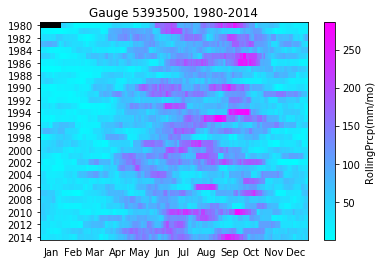

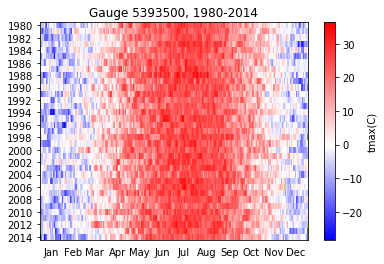

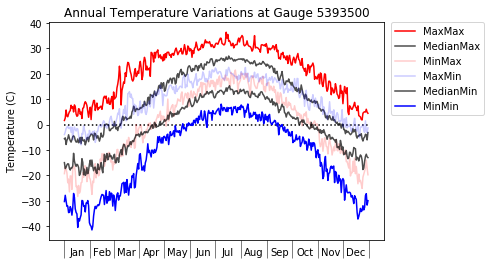

In [10]:
dataset='daymet'
fig = RollingRasterPrecip(gauge,dataset,window=30)
fig = RasterTemps(gauge,'max',dataset)
fig = TypicalTemps(gauge,dataset)

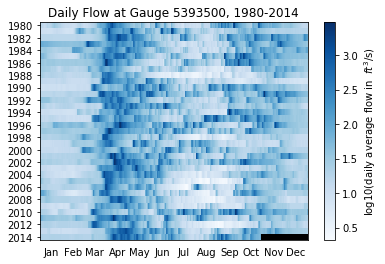

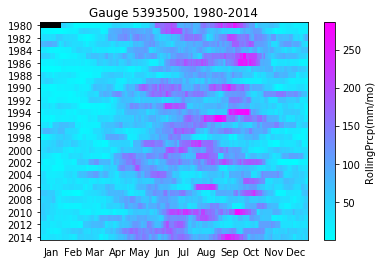

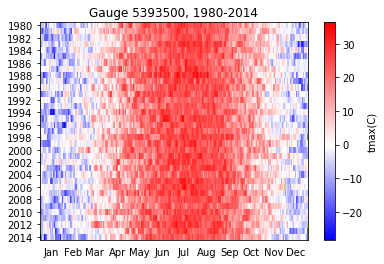

In [11]:
#RASTER PLOTS
fig = RasterHydrograph(gauge)
fig = RollingRasterPrecip(gauge,dataset,window=30)
fig = RasterTemps(gauge,'max','daymet')


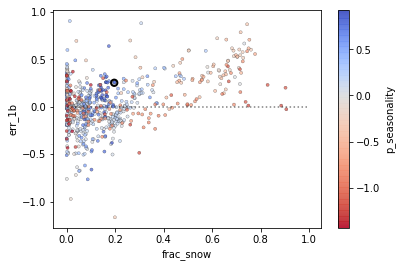

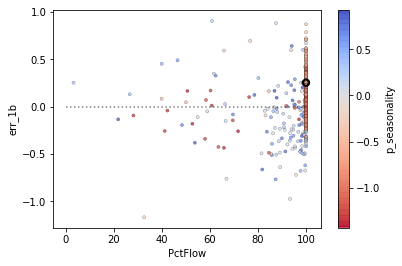

In [12]:
comparisonplot('clim','frac_snow','fdc_info','err_1b','clim','p_seasonality',gauge,colors=3,show=0)
plt.plot([0,1],[0,0],'k:',alpha=0.5); plt.show()

comparisonplot('fdc_info','PctFlow','fdc_info','err_1b','clim','p_seasonality',gauge,colors=3,show=0)
plt.plot([0,100],[0,0],'k:',alpha=0.5); plt.show()

#comparisons(gauge)  #Use ComparisonsLive.ipynb